# Credit Card Fraud Detection and Trend Analysis

### This project aims to detect fraudulent credit card transactions and analyze transaction trends using Python.  
### We'll explore data cleaning, transformation, model building, and visualization techniques.


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fraud_train=pd.read_csv("fraudTrain.csv")
fraud_test=pd.read_csv("fraudTest.csv")
fraud_train.shape,fraud_test.shape

((1048575, 22), (555719, 22))

#### Lets begin by loading the training and testing datasets.  
#### We'll look at basic structure, column names, and sample rows.


In [3]:
fraud_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1/1/2019 0:00,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1/1/2019 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,1/1/2019 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,1/1/2019 0:01,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,1/1/2019 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


fraud_train.info()

#### Lets now check the data types, missing values, and numerical distributions to understand what kind of cleaning and transformations are needed.


In [4]:
fraud_train.isna().sum().sort_values(ascending=False).head()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
dtype: int64

In [5]:
fraud_train["trans_date_trans_time"]=pd.to_datetime(fraud_train["trans_date_trans_time"],errors="coerce")
fraud_test["trans_date_trans_time"]=pd.to_datetime(fraud_test["trans_date_trans_time"],errors="coerce")

In [6]:
fraud_train.describe().T

,count,mean,min,25%,50%,75%,max,std
trans_date_trans_time,1048575,2019-08-14 03:47:22.322695168,2019-01-01 00:00:00,2019-05-10 20:39:00,2019-08-13 23:45:00,2019-12-01 12:46:30,2020-03-10 16:08:00,NaN
cc_num,1048575.0,417156450487236224.0,60416207185.0,180040000000000.0,3520550088202337.0,4642255475285942.0,4992346398065154048.0,1308811001211806976.0
amt,1048575.0,70.279095,1.0,9.64,47.45,83.05,28948.9,159.951841
zip,1048575.0,48801.590604,1257.0,26237.0,48174.0,72042.0,99783.0,26898.040351
lat,1048575.0,38.533364,20.0271,34.6205,39.3543,41.9404,66.6933,5.076852
long,1048575.0,-90.226256,-165.6723,-96.798,-87.4769,-80.158,-67.9503,13.758582
city_pop,1048575.0,89057.759063,23.0,743.0,2456.0,20328.0,2906700.0,302435.05762
unix_time,1048575.0,1344905832.778656,1325376018.0,1336682353.0,1344901521.0,1354366012.0,1362931730.0,10196997.483775
merch_lat,1048575.0,38.533463,19.027785,34.72954,39.362945,41.956021,67.510267,5.111233
merch_long,1048575.0,-90.226477,-166.671242,-96.898639,-87.439226,-80.232279,-66.950902,13.770929


In [7]:
fraud_train["is_fraud"].value_counts()  #to check how many transactions are fraud

is_fraud
0    1042569
1       6006
Name: count, dtype: int64

#### This shows that the data is highly imbalanced

In [8]:
fraud_train["category"].value_counts()   #to look at top categories that shows what type of transactions are most common

category
gas_transport     106430
grocery_pos        99906
home               99578
shopping_pos       94353
kids_pets          91404
shopping_net       78899
entertainment      75981
food_dining        74041
personal_care      73498
health_fitness     69362
misc_pos           64492
misc_net           51082
grocery_net        36719
travel             32830
Name: count, dtype: int64

#### Now lets extract extra insights from the timestamp so that we can get some patterns that will help us identify fraud

In [9]:
fraud_train["hour"]=fraud_train["trans_date_trans_time"].dt.hour
fraud_train["day_of_week"]=fraud_train["trans_date_trans_time"].dt.dayofweek
fraud_train["day"]=fraud_train["trans_date_trans_time"].dt.day
fraud_train["month"]=fraud_train["trans_date_trans_time"].dt.month
fraud_train["year"]=fraud_train["trans_date_trans_time"].dt.year
fraud_train[["trans_date_trans_time","hour","day_of_week","day","month","year"]].head()
fraud_test["hour"]=fraud_test["trans_date_trans_time"].dt.hour
fraud_test["day_of_week"]=fraud_test["trans_date_trans_time"].dt.dayofweek
fraud_test["day"]=fraud_test["trans_date_trans_time"].dt.day
fraud_test["month"]=fraud_test["trans_date_trans_time"].dt.month
fraud_test["year"]=fraud_test["trans_date_trans_time"].dt.year
fraud_test[["trans_date_trans_time","hour","day_of_week","day","month","year"]].head()

,trans_date_trans_time,hour,day_of_week,day,month,year
0,2020-06-21 12:14:00,12,6,21,6,2020
1,2020-06-21 12:14:00,12,6,21,6,2020
2,2020-06-21 12:14:00,12,6,21,6,2020
3,2020-06-21 12:15:00,12,6,21,6,2020
4,2020-06-21 12:15:00,12,6,21,6,2020


In [10]:
fraud_train[["trans_date_trans_time","hour","day_of_week","day","month","year"]].tail()

,trans_date_trans_time,hour,day_of_week,day,month,year
1048570,2020-03-10 16:07:00,16,1,10,3,2020
1048571,2020-03-10 16:07:00,16,1,10,3,2020
1048572,2020-03-10 16:08:00,16,1,10,3,2020
1048573,2020-03-10 16:08:00,16,1,10,3,2020
1048574,2020-03-10 16:08:00,16,1,10,3,2020


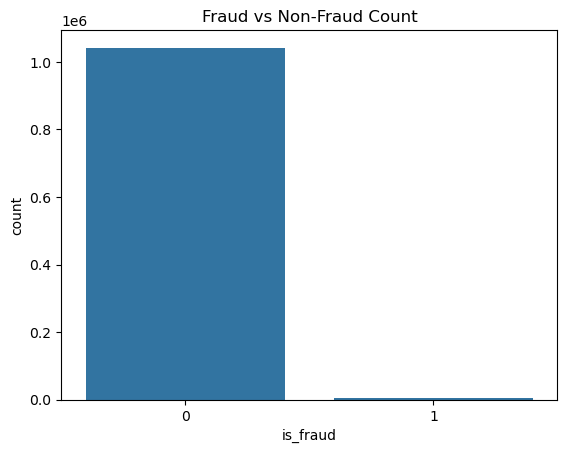

In [11]:
sns.countplot(data=fraud_train, x='is_fraud')
plt.title("Fraud vs Non-Fraud Count")
plt.show()

# Froud By Hour Of Day

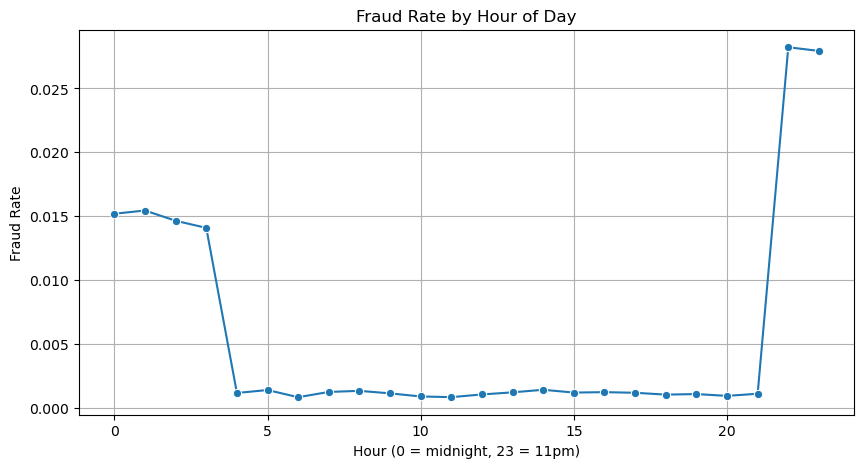

,hour,is_fraud
0,0,0.015198
1,1,0.015450
2,2,0.014648
3,3,0.014093
4,4,0.001178


In [12]:
fraud_by_hour = fraud_train.groupby("hour")["is_fraud"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=fraud_by_hour, x="hour", y="is_fraud", marker="o")
plt.title("Fraud Rate by Hour of Day")
plt.xlabel("Hour (0 = midnight, 23 = 11pm)")
plt.ylabel("Fraud Rate")
plt.grid(True)
plt.show()

fraud_by_hour.head()

#### most normal transactions happen through out the day and a noticeable rise after 11 AM and continuing strong untill 11PM
#### fradulent transactions starts to appear more noticeable around midnight(0 to 3AM) and late at night(22-23PM)
##### What this means is that fraudsters may prefer late at night or early mornings

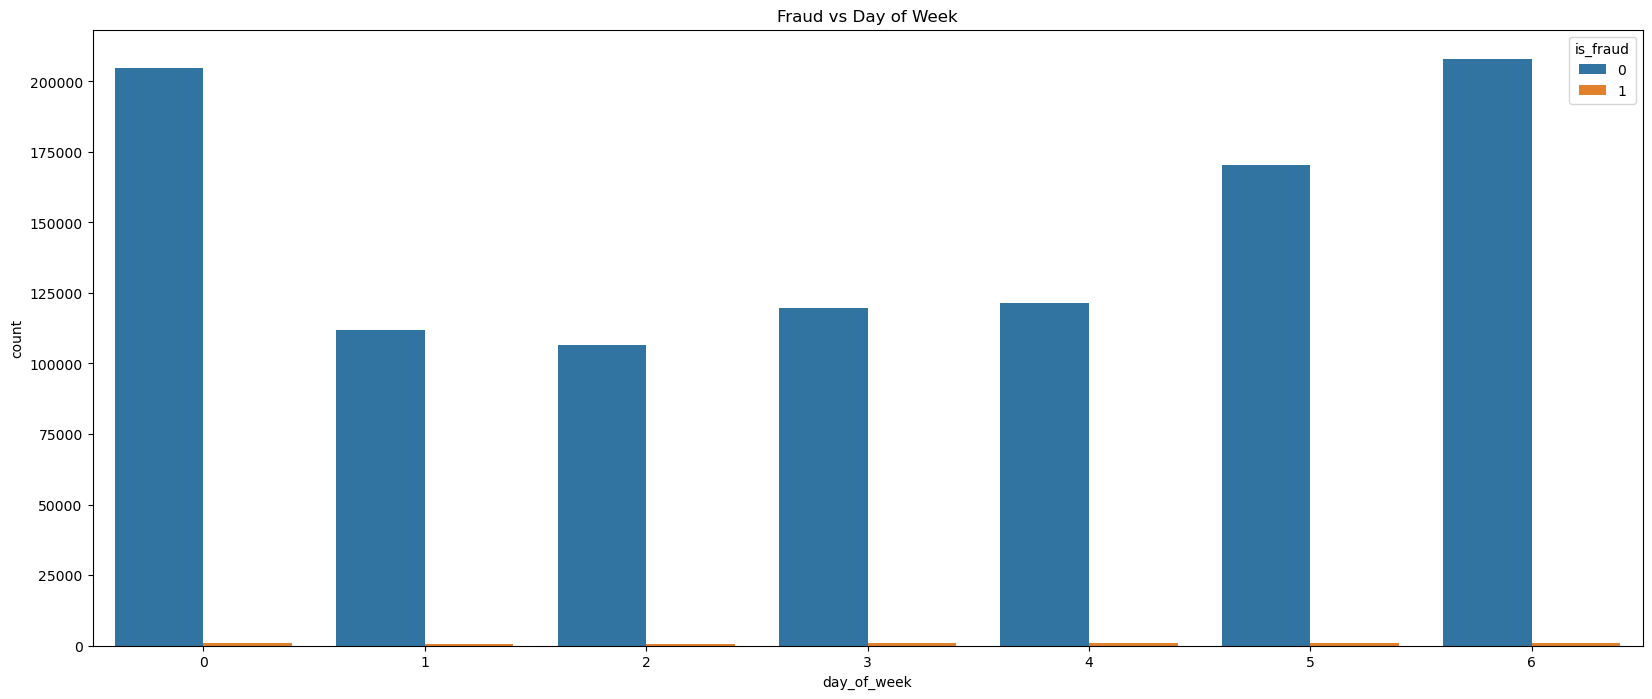

In [13]:
plt.figure(figsize=(20,8))
sns.countplot(data=fraud_train, x='day_of_week', hue='is_fraud')
plt.title("Fraud vs Day of Week")
plt.show()

#### Transactions are heaviest on Mondays (0) and Sundays (6), with slightly fewer mid-week.
#### Fraud occurs all week but tends to mirror transaction volume

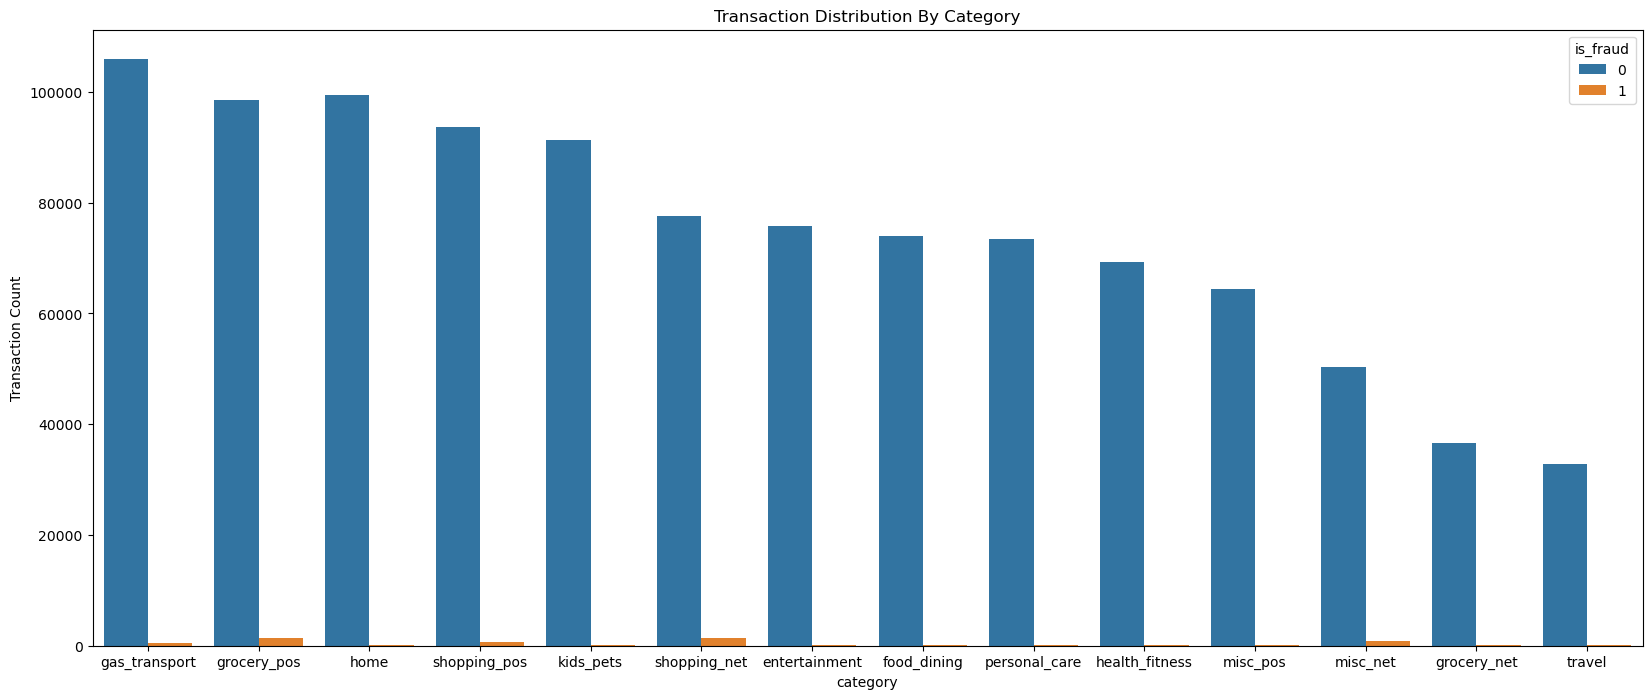

In [14]:
plt.figure(figsize=(20,8))
top_categories=fraud_train["category"].value_counts().index[:15]
sns.countplot(x='category', hue='is_fraud', data=fraud_train, order=top_categories)
plt.title("Transaction Distribution By Category")
plt.ylabel("Transaction Count")
plt.show()

#### Fraud appears concentrated in categories like shopping_net or misc_net, while essential expenses (like gas_transport, grocery_pos) have relatively fewer frauds.
#### That makes sense,online transactions are more vulnerable than in-person purchases.

### Now lets prepare our data for modeling
##### First lets create a working copy to protect the original data and then lets drop some columns that wont help the model

In [15]:
cols_to_use=['category','amt','gender','lat','long','city_pop','merch_lat','merch_long','is_fraud','hour','day_of_week','day','month','year']
model_df = fraud_train[cols_to_use].copy()
model_df_test=fraud_test[cols_to_use].copy()
model_df.head()


,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour,day_of_week,day,month,year
0,misc_net,4.97,F,36.0788,-81.1781,3495,36.011293,-82.048315,0,0,1,1,1,2019
1,grocery_pos,107.23,F,48.8878,-118.2105,149,49.159047,-118.186462,0,0,1,1,1,2019
2,entertainment,220.11,M,42.1808,-112.2620,4154,43.150704,-112.154481,0,0,1,1,1,2019
3,gas_transport,45.00,M,46.2306,-112.1138,1939,47.034331,-112.561071,0,0,1,1,1,2019
4,misc_pos,41.96,M,38.4207,-79.4629,99,38.674999,-78.632459,0,0,1,1,1,2019


#### Convert all non-numeric (categorical) columns such as gender or category into numeric values so your model can interpret them.

In [16]:
cols_to_encode=['category','gender']
model_df = pd.get_dummies(model_df,columns=cols_to_encode,drop_first=True)
model_df_test = pd.get_dummies(model_df_test,columns=cols_to_encode,drop_first=True)
model_df.head()


,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour,day_of_week,day,...,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,4.97,36.0788,-81.1781,3495,36.011293,-82.048315,0,0,1,1,...,False,False,False,True,False,False,False,False,False,False
1,107.23,48.8878,-118.2105,149,49.159047,-118.186462,0,0,1,1,...,False,False,False,False,False,False,False,False,False,False
2,220.11,42.1808,-112.2620,4154,43.150704,-112.154481,0,0,1,1,...,False,False,False,False,False,False,False,False,False,True
3,45.00,46.2306,-112.1138,1939,47.034331,-112.561071,0,0,1,1,...,False,False,False,False,False,False,False,False,False,True
4,41.96,38.4207,-79.4629,99,38.674999,-78.632459,0,0,1,1,...,False,False,False,False,True,False,False,False,False,True


In [17]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler()
X_train=model_df.drop(columns=['is_fraud'])
y_train=model_df.is_fraud
X_test=model_df_test.drop(columns=['is_fraud'])
y_test=model_df_test.is_fraud
X_resampled,y_resampled=rus.fit_resample(X_train,y_train)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_resampled,y_resampled)
predictions=rf.predict(X_test)
from sklearn.metrics import classification_report
report=classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.14      0.95      0.24      2145

    accuracy                           0.98    555719
   macro avg       0.57      0.96      0.61    555719
weighted avg       1.00      0.98      0.99    555719



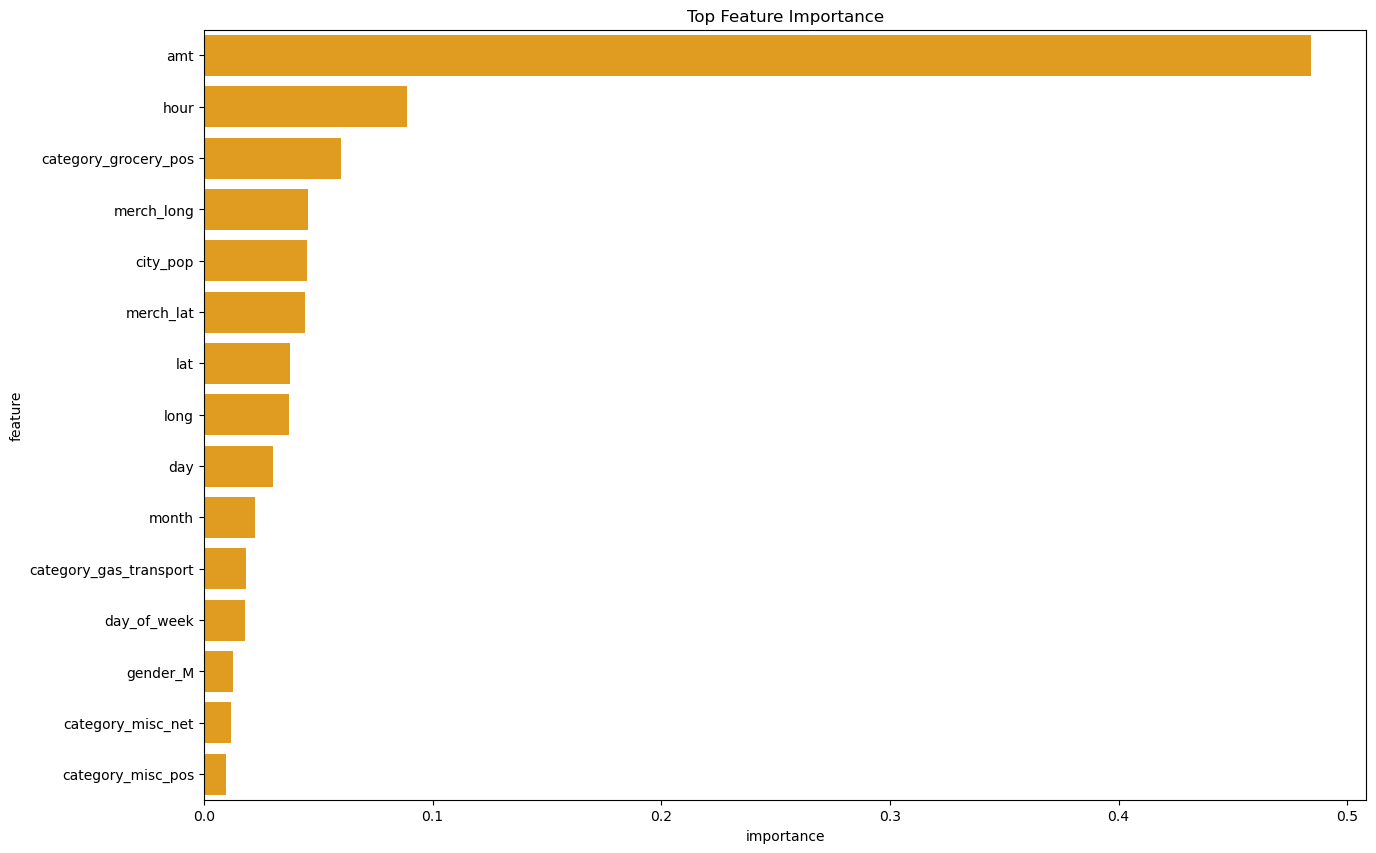

In [22]:
importances = rf.feature_importances_
features = X_train.columns
feat_df = pd.DataFrame({"feature": features, "importance": importances})
feat_df = feat_df.sort_values(by="importance", ascending=False).head(15)
plt.figure(figsize=(15,10))
sns.barplot(x="importance", y="feature", data=feat_df, color='orange')
plt.title("Top Feature Importance")
plt.show()


In [21]:
feat_df.to_csv("feature_importance_tableau.csv", index=False)